In [35]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from dtw import *
from pykrx import stock
from datetime import datetime, timedelta

In [36]:
df = pd.read_csv("AE_abs.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap.,Trade Value,Institutional Vo.,ETC Vo.,...,PER,PBR,EPS,DIV,DPS,Short Selling Vo.,Balance Amount,Short Selling Trade Value,Balance Value,Sum
0,2016-07-01,0.269,0.264,0.244,0.243,0.0458,0.260,0.237,0.1110,0.143,...,0.260,0.271,0.158,0.210,0.333,0.1160,0.362,0.163,0.10800,4.49880
1,2016-07-04,0.263,0.283,0.321,0.257,0.1230,0.249,0.230,0.0423,0.167,...,0.278,0.275,0.179,0.172,0.349,0.2510,0.319,0.179,0.00227,4.67207
2,2016-07-05,0.236,0.273,0.257,0.210,0.1950,0.249,0.278,0.0254,0.119,...,0.270,0.301,0.172,0.207,0.357,0.2420,0.349,0.183,0.01170,4.62910
3,2016-07-06,0.229,0.316,0.226,0.316,0.1400,0.244,0.190,0.1470,0.132,...,0.284,0.326,0.168,0.232,0.360,0.0743,0.394,0.121,0.00314,4.66344
4,2016-07-07,0.244,0.259,0.225,0.265,0.1450,0.328,0.268,0.0968,0.142,...,0.283,0.307,0.169,0.233,0.341,0.2770,0.390,0.183,0.00870,4.80550


In [38]:
X = df.index
y_1 = df["Foreign Vo."]
y_2 = df["Individual Vo."]
y_3 = df["Sum"]

In [39]:
tmp_df = stock.get_market_ohlcv_by_date("20160701", "20210714", "000660")
#tmp_df = stock.get_market_trading_volume_by_date("20160701", "20210714", "000660")
dfPlot = tmp_df["종가"]
minnum = np.min(dfPlot)
maxnum = np.max(dfPlot)
for i in range(len(dfPlot)):
    dfPlot.iloc[i] = (dfPlot.iloc[i]-minnum)/(maxnum-minnum)
df_tmp = df["Sum"]
minnum = np.min(df_tmp)
maxnum = np.max(df_tmp)
for i in range(len(df_tmp)):
    df_tmp.iloc[i] = (df_tmp.iloc[i]-minnum)/(maxnum-minnum)

C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


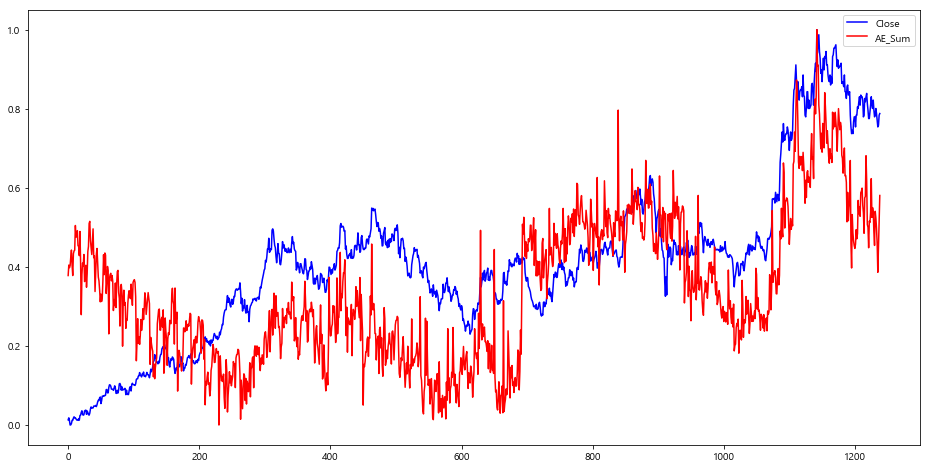

In [40]:
plt.figure(figsize = (16, 8))
plt.plot(X, dfPlot, c = 'b', label = 'Close')
plt.plot(X, df_tmp, c = 'r', label = 'AE_Sum')
plt.legend(["Close", "AE_Sum"])

In [41]:
A = dfPlot.to_numpy()
B = df_tmp.to_numpy()

In [42]:
#dtw(A, B, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)
print("Weight: ", dtw(A, B, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).distance)

Weight:  159.37859129287588


Text(0.5, 1.0, 'Difference Value Between Autoencoder Result And Original Value')

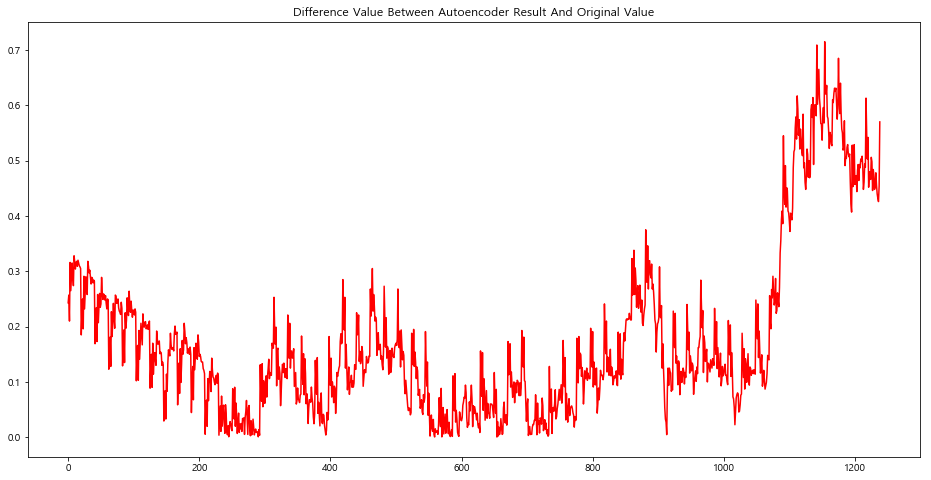

In [43]:
plt.figure(figsize = (16, 8))
#plt.plot(X, y_1, 'o')
#plt.plot(X, y_2, 'o')
#plt.plot(X, y_3, 'o')
#plt.plot(X, y_4, 'o')
plt.plot(X, y_4, c = 'r', label = 'AE')

plt.title("Difference Value Between Autoencoder Result And Original Value")
#plt.legend(["Open", "High", "Low", "Close"])

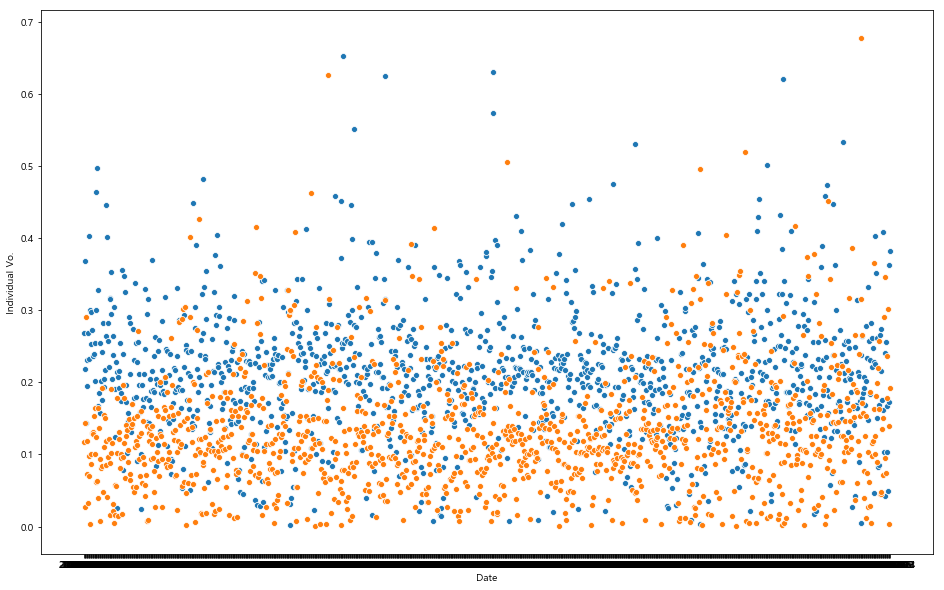

In [13]:
plt.subplots(figsize=(16,10))
sns.scatterplot(x = "Date", y = "Foreign Vo.", data = df)
sns.scatterplot(x = "Date", y = "Individual Vo.", data = df)
#sns.scatterplot(x = "Date", y = "Institutional Vo.", data = df)

In [44]:
linear_F = LinearRegression()
linear_F.fit(X.values.reshape(-1,1), y_1)
linear_I = LinearRegression()
linear_I.fit(X.values.reshape(-1,1), y_2)
linear = LinearRegression()
linear.fit(X.values.reshape(-1,1), y_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\crara\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\crara\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

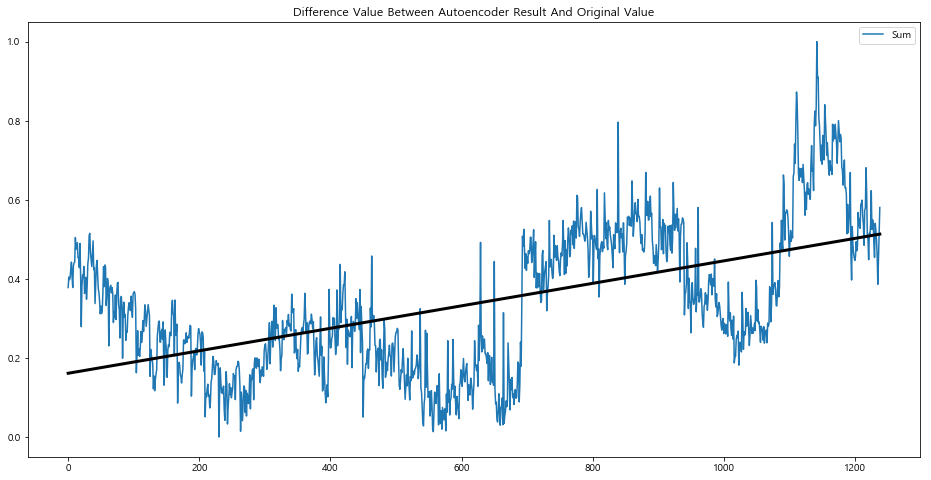

In [45]:
plt.figure(figsize = (16, 8))
#plt.plot(X, y_1, 'o')
#plt.plot(X, y_2, 'o')
plt.plot(X, y_3, label = "Sum")
#line_1 = plt.plot(X, linear_F.predict(X.values.reshape(-1,1)))
#line_2 = plt.plot(X, linear_I.predict(X.values.reshape(-1,1)))
line_3 = plt.plot(X, linear.predict(X.values.reshape(-1,1)))
#plt.setp(line_1, color  ='k', linewidth = 3.0)
#plt.setp(line_2, color  ='b', linewidth = 3.0)
plt.setp(line_3, color  ='k', linewidth = 3.0)
plt.title("Difference Value Between Autoencoder Result And Original Value")
plt.legend(["Sum"])
plt.show()

In [46]:
print(linear_F.coef_) # 기울기
print(linear_F.intercept_) # 절편
a = linear_F.coef_
b = linear_F.intercept_

[-6.02382021e-06]
0.21704261072925618


In [47]:
def linear_plot(date_1, date_2, code):
    new_df = stock.get_market_trading_volume_by_date(date_1, date_2, code)
    ret_list = []
    tmp_df = stock.get_market_ohlcv_by_date(date_1, date_2, code)
    for i in range(len(new_df)):
        ret_tmp = (tmp_df.iloc[i, 3] / tmp_df.iloc[i, 0] - 1) * 100
        ret_list.append(ret_tmp)
    new_df['수익률'] = ret_list
    dfPlot = new_df[::-1]

    for i in range(0,dfPlot.shape[1]):
        dfPlot.iloc[:,i] = (dfPlot.iloc[:,i]-np.min(dfPlot.iloc[:,i]))/(np.max(dfPlot.iloc[:,i])-np.min(dfPlot.iloc[:,i]))
    
    return new_df.index, dfPlot

In [48]:
flag = 0
list_i = []
for i in range(len(X)):
    if abs(y_1[i] - (a * i + b)) > 0.2:
        #print(i)
        list_i.append(i)
        flag += 1
print(list_i)

[18, 20, 34, 167, 182, 317, 385, 395, 398, 410, 415, 463, 536, 628, 629, 653, 664, 698, 734, 749, 776, 812, 847, 932, 946, 1036, 1037, 1049, 1070, 1074, 1138, 1142, 1151, 1166, 1194]


In [58]:
date = df["Date"]
f = open("data.txt", 'w')
for i in range(len(list_i)):
    a_date = datetime.strptime(date[list_i[i]], '%Y-%m-%d')
    b_date = a_date - timedelta(days = 100)
    a_date = a_date.strftime("%Y%m%d")
    b_date = b_date.strftime("%Y%m%d")
    f.write("Initial Date: ")
    f.write(b_date) # 20일 60일
    f.write(" Final Date: ")
    f.write(a_date)
    f.write("\n")
    f.write("10일 동안의 수익률: ")
    df_ret = stock.get_market_ohlcv_by_date(b_date, a_date, "000660")
    ret_1 = (df_ret.iloc[0, 3] / df_ret.iloc[9, 0] - 1) * 100
    f.write(str(ret_1))
    f.write("\n")
    f.write("20일 동안의 수익률: ")
    ret_2 = (df_ret.iloc[0, 3] / df_ret.iloc[19, 0] - 1) * 100
    f.write(str(ret_2))
    f.write("\n")
    f.write("30일 동안의 수익률: ")
    ret_3 = (df_ret.iloc[0, 3] / df_ret.iloc[29, 0] - 1) * 100
    f.write(str(ret_3))
    f.write("\n")
    df_index, dfPlot = linear_plot(b_date, a_date, "000660")
    A = dfPlot['외국인합계'].to_numpy()
    B = dfPlot['기관합계'].to_numpy()
    C = dfPlot['개인'].to_numpy()
    D = dfPlot['수익률'].to_numpy()
    f.write("외국인 거래량과 주식 수익률 간의 Weight: ")
    a_data = str(dtw(A, D, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).distance)
    f.write(a_data)
    f.write("\n")
    f.write("기관 거래량과 주식 수익률 간의 Weight: ")
    b_data = str(dtw(B, D, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).distance)
    f.write(b_data)
    f.write("\n")
    f.write("개인 거래량과 주식 수익률 간의 Weight: ")
    c_data = str(dtw(C, D, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).distance)
    f.write(c_data)
    f.write("\n\n")
f.close()

In [12]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X.values.reshape(-1,1))